In [1]:
# Load Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('dodgers.csv')

In [3]:
# View the data
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [4]:
# I want to create a new column called promo that will combine the promotion items variables as one 

# Ceate a list of conditions
conditions = [
    (df.cap == 'YES'),
    (df.shirt == 'YES'),
    (df.fireworks == 'YES'),
    (df.bobblehead == 'YES')
    ]

# Create a list of promotion variables
values = ['cap', 'shirt', 'fireworks', 'bobblehead']

# Create the new variable 
df['promo'] = np.select(conditions, values)
# df

# Games without promotions were given a value of 0. I want to change this to "none"
df['promo'] = df['promo'].replace('0', 'none')
#df

#Now I can drop the individual promotion columns
df.drop(values, axis=1, inplace=True)

# display updated DataFrame
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,promo
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,none
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,none
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,none
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,fireworks
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,none
...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,none
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,none
78,OCT,1,33624,Monday,Giants,86,Clear,Night,none
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,none


In [5]:
# Function to convert categorical variables into such
def cat_convert(var):
    df[var] = df[var].astype('category')
    return df[var]

In [6]:
# Lists of categorical and numerical variables
cat_vars = ['month', 'day_of_week', 'opponent', 'skies', 'day_night', 'promo']
num_vars = ['day', 'temp']

In [7]:
# Convert categorical variables 
for var in cat_vars:
    cat_convert(var)

In [8]:
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [63]:
def cat_boxplot(var, order_list, x_label):
    sns.set_style(style='white')
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x=var, y='attend', data=df, order=order_list, color='darkslateblue')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)#, horizontalalignent='day')
    plt.xlabel(x_label, size=16)
    for pos in ['right', 'top']:
        plt.gca().spines[pos].set_visible(False)
    plt.ylabel('attendance', size=16)
    
    plt.show()

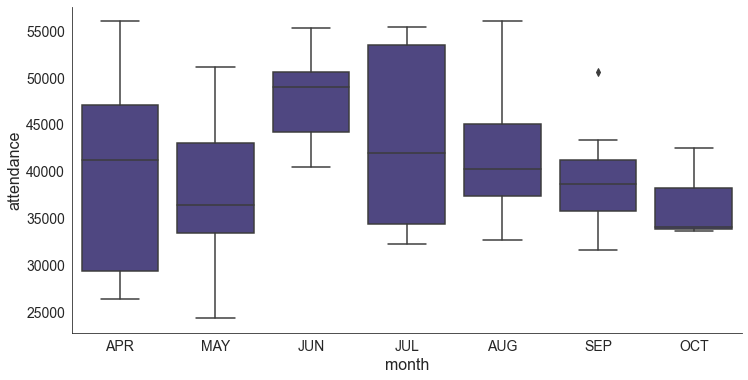

In [64]:
cat_boxplot('month', ['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'], 'month')

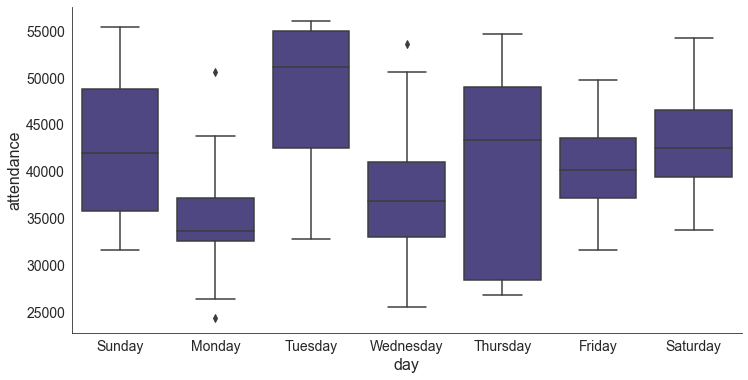

In [54]:
cat_boxplot('day_of_week', ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 'day')

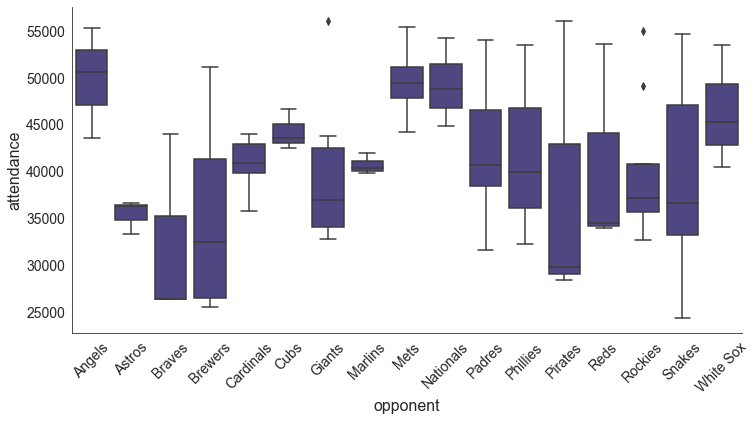

In [56]:
cat_boxplot('opponent', None, 'opponent')

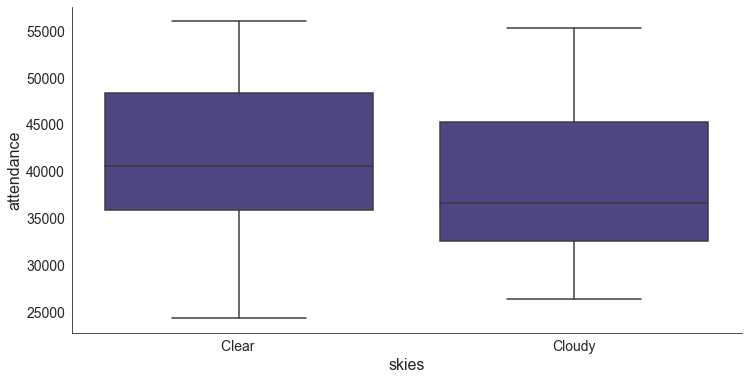

In [58]:
cat_boxplot('skies', None, 'skies')

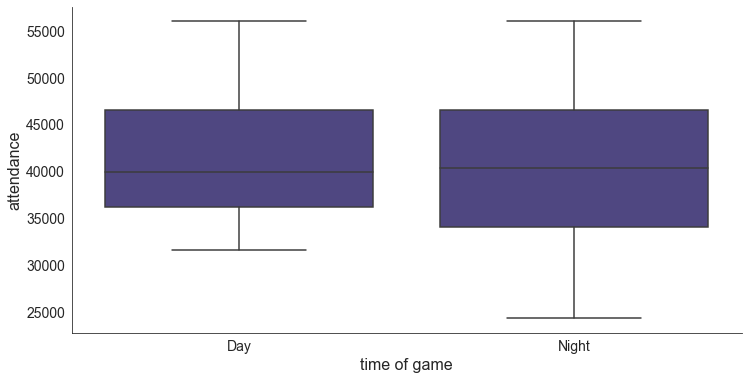

In [59]:
cat_boxplot('day_night', None, 'time of game')

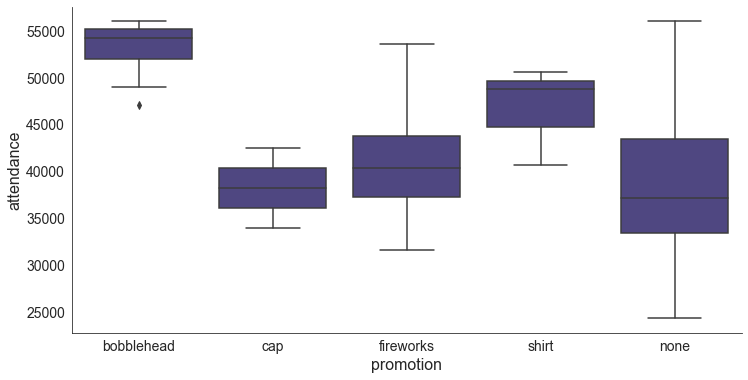

In [60]:
cat_boxplot('promo', ['bobblehead', 'cap', 'fireworks', 'shirt', 'none'], 'promotion')

Though there are months with less attended games than September and October, the maximum attendance is general much less than other months. This pattern can also be seen on games played on Monday's. Games that have bobblehead promotions have the most attendance.  

In [65]:
def num_scatter(var, x_label):
    sns.set_style(style='white')
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=var, y='attend', data=df, color='darkslateblue')
    plt.xlabel(x_label, size=16)
    for pos in ['right', 'top']:
        plt.gca().spines[pos].set_visible(False)
    plt.ylabel('attendance', size=16)
    
    plt.show()

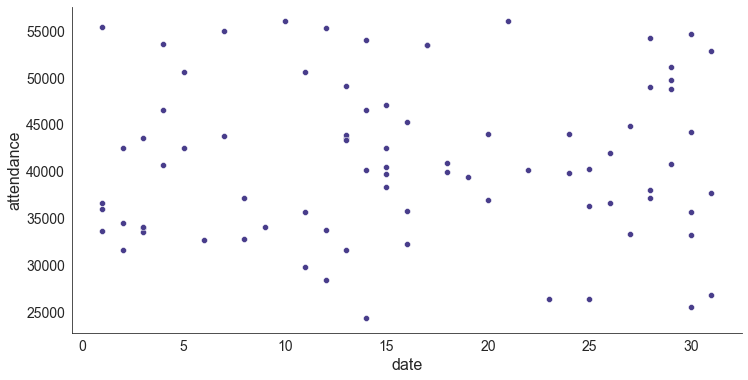

In [66]:
num_scatter('day', 'date')

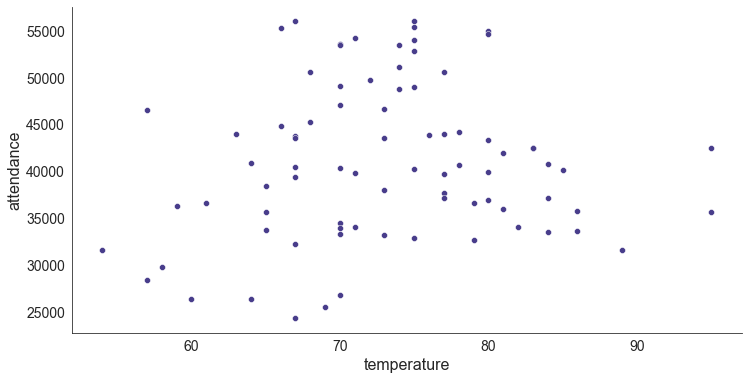

In [68]:
num_scatter('temp', 'temperature')

There seems to be a trend with the temperature variable. I will look more into it. 

In [11]:
df[df['temp']>80].sort_values(by='attend', ascending=False)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,promo
54,AUG,5,42495,Sunday,Cubs,83,Clear,Day,cap
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,none
73,SEP,15,42449,Saturday,Cardinals,95,Clear,Night,none
63,AUG,26,41907,Sunday,Marlins,81,Clear,Day,none
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,none
72,SEP,14,40167,Friday,Cardinals,85,Clear,Night,fireworks
57,AUG,8,37084,Wednesday,Rockies,84,Clear,Night,none
66,SEP,1,35992,Saturday,Snakes,81,Clear,Night,none
74,SEP,16,35754,Sunday,Cardinals,86,Clear,Day,none
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,none


When the temperture is greater than $80^{\circ}$, attendance does not reach 43,000. 

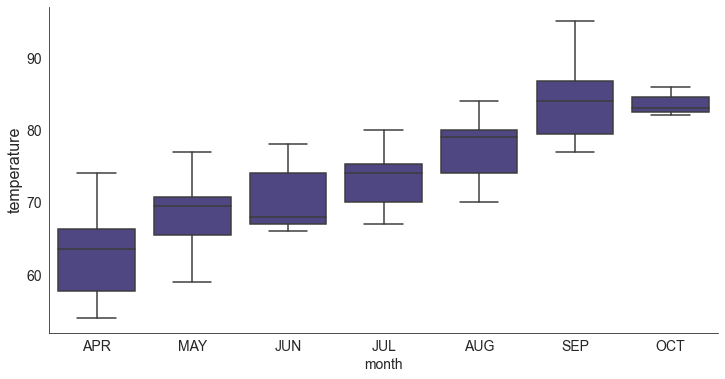

In [70]:
sns.set_style(style='white')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='month', y='temp', data=df, order=['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'], color='darkslateblue')
for pos in ['right', 'top']:
    plt.gca().spines[pos].set_visible(False)
plt.ylabel('temperature', size=16)
    
plt.show()

The months with the highest temperatures are September and October. Now, I will use R to create a linear regression model to predict attendance based on month, day_of_week, and promo.

**R Code**

In [1]:
# Load the data 
df <- read.csv('dodgers.csv')

In [4]:
# Create the promo variable
df$promo[df$cap=="YES"]<-"cap"
df$promo[df$shirt=="YES"]<-"shirt"
df$promo[df$fireworks=="YES"]<-"fireworks"
df$promo[df$bobblehead=="YES"]<-"bobblehead"
df$promo[is.na(df$promo)] <- "none"

In [5]:
# Remove individual promotion variables
df <- subset(df, select = -c(cap, shirt, fireworks, bobblehead))

In [6]:
head(df)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,promo
,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<chr>
1,APR,10,56000,Tuesday,Pirates,67,Clear,Day,none
2,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,none
3,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,none
4,APR,13,31601,Friday,Padres,54,Cloudy,Night,fireworks
5,APR,14,46549,Saturday,Padres,57,Cloudy,Night,none
6,APR,15,38359,Sunday,Padres,65,Clear,Day,none


In [7]:
model = lm(attend ~ month + day_of_week + promo, df)
summary(model)


Call:
lm(formula = attend ~ month + day_of_week + promo, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
 -8748  -3846   -602   2435  15966 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           32932.9     6937.7   4.747 1.20e-05 ***
monthAUG               3341.1     2304.3   1.450 0.151961    
monthJUL               2564.3     2555.9   1.003 0.319512    
monthJUN               6933.4     2573.8   2.694 0.009009 ** 
monthMAY              -1924.8     2175.8  -0.885 0.379664    
monthOCT                221.8     3825.9   0.058 0.953946    
monthSEP               -102.9     2367.3  -0.043 0.965452    
day_of_weekMonday     10931.4     6802.8   1.607 0.112998    
day_of_weekSaturday   17884.0     6658.4   2.686 0.009202 ** 
day_of_weekSunday     18225.2     6712.9   2.715 0.008510 ** 
day_of_weekThursday   12245.2     6947.4   1.763 0.082750 .  
day_of_weekTuesday    19352.0     6811.9   2.841 0.006026 ** 
day_of_weekWednesday  1246

Now I will make predictions using the linear model to decide when to run the marketing promotion. First, I will look at Monday's in September. 

In [8]:
sep_pred <- predict(model, data.frame(month = "SEP", day_of_week = "Monday", promo = "bobblehead"))
sep_pred

1 
43761.42

Based on the linear model, attendance will be approximately 43761 when running a bobblehead marketing promotion for games on Monday's in September. 

In [8]:
subset(df, month=="SEP" & day_of_week=="Monday")

,month,day,attend,day_of_week,opponent,temp,skies,day_night,promo
69,SEP,3,33540,Monday,Padres,84,Cloudy,Night,none


In [9]:
predict(model, data.frame(month = "SEP", day_of_week = "Monday", promo = "none"))

1 
33061.28

There was only one Monday game played in September. There was no promotion and attendance was 33540. The linear regression model predicted attendance to be 33061, which is less than actual attendance (but minimal).

In [10]:
(sep_pred - 33540) / 33540

1 
0.3047532

Based on the model, attendance has the possibility of increasing attendance by 30% if a bobblehead marketing promotion is ran on Monday games in September. Now, I will look at Monday's in October. 

In [11]:
oct_pred <- predict(model, data.frame(month = "OCT", day_of_week = "Monday", promo = "bobblehead"))
oct_pred

1 
44086.18

Based on the linear model, attendance will be approximately 44086 when running a bobblehead marketing promotion for games on Monday's in October. 

In [12]:
subset(df, month=="OCT" & day_of_week=="Monday")

,month,day,attend,day_of_week,opponent,temp,skies,day_night,promo
79,OCT,1,33624,Monday,Giants,86,Clear,Night,none


In [13]:
predict(model, data.frame(month = "OCT", day_of_week = "Monday", promo = "none"))

1 
33386.04

There was only one Monday game played in October. There was no promotion and attendance was 33624. The linear regression model predicted attendance to be 33386, which is less than actual attendance (but minimal).

In [14]:
(oct_pred - 33624) / 33624

1 
0.3111522

Based on the model, attendance has the possibility of increasing attendance by 31% if a bobblehead marketing promotion is ran on Monday games in October. Therefore, I would recommend running bobblehead marketing promotions on Monday games in September and October. 